<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [1]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('kmeansdata.mat')

In [2]:
X = mat['X']
print(X.shape)

(100, 2)


## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [3]:
def distance_to_cluster(point, centroid):
    return (point-centroid).T@(point-centroid)

In [4]:
def closest_centroid(point, centroids):
    dists = [distance_to_cluster(point, centroids[i]) for i in range (len(centroids))]
    return dists.index(min(dists))

In [5]:
def compute_centroid(k, data, assigned):
    indices = [i for i, point in enumerate(assigned) if point == k]
    if len(indices)==0:
        return np.random.rand(2)
    centroid = np.mean(data[indices], axis = 0)
    return centroid

In [6]:
def kmeans(data, k, centroids=None):
    centroids = np.random.rand(k, 2)
    assigned_clusters = [0]*len(data)
    copy = np.random.rand(k, 2)
    i=0
    while (centroids!= copy).any():
        copy = centroids.copy()
        for i in range(len(data)):
            assigned_clusters[i] = closest_centroid(data[i], centroids)
        for i in range (k):
            centroids[i] = compute_centroid(i, data, assigned_clusters)
        i+=1
    return assigned_clusters

12


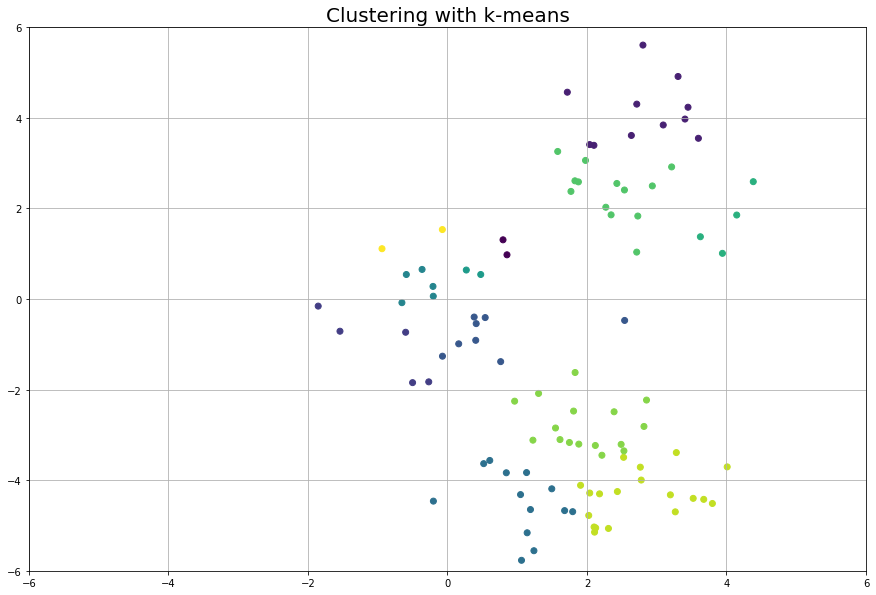

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=kmeans(X, 12))
plt.title("Clustering with k-means", fontsize=20)
plt.axis([-6, 6, -6, 6])
plt.grid()
plt.show()

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

In [8]:
a = [0, 0]
b = a.copy()
a[0] = 1

In [124]:
print(b)

[0, 0]
